In [1]:
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt

In [2]:
sentences = ["Köpek çok tatlı bir hayvandır.",
              "Köpekler evcil hayvanlardır.",
              "Kediler genellikle bağımsız hareket etmeyi severler.",
              "Köperler sadık ve dost canlısı hayvanlardır.",
              "Hayvanlar insanlar için iyi arkadaşlardır."]

In [3]:
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

In [4]:
word2_vec_model = Word2Vec(tokenized_sentences, vector_size= 50, window = 5, min_count = 1, sg = 0)
fast_text_model = FastText(tokenized_sentences, vector_size = 50, window = 5, min_count = 1, sg = 0)

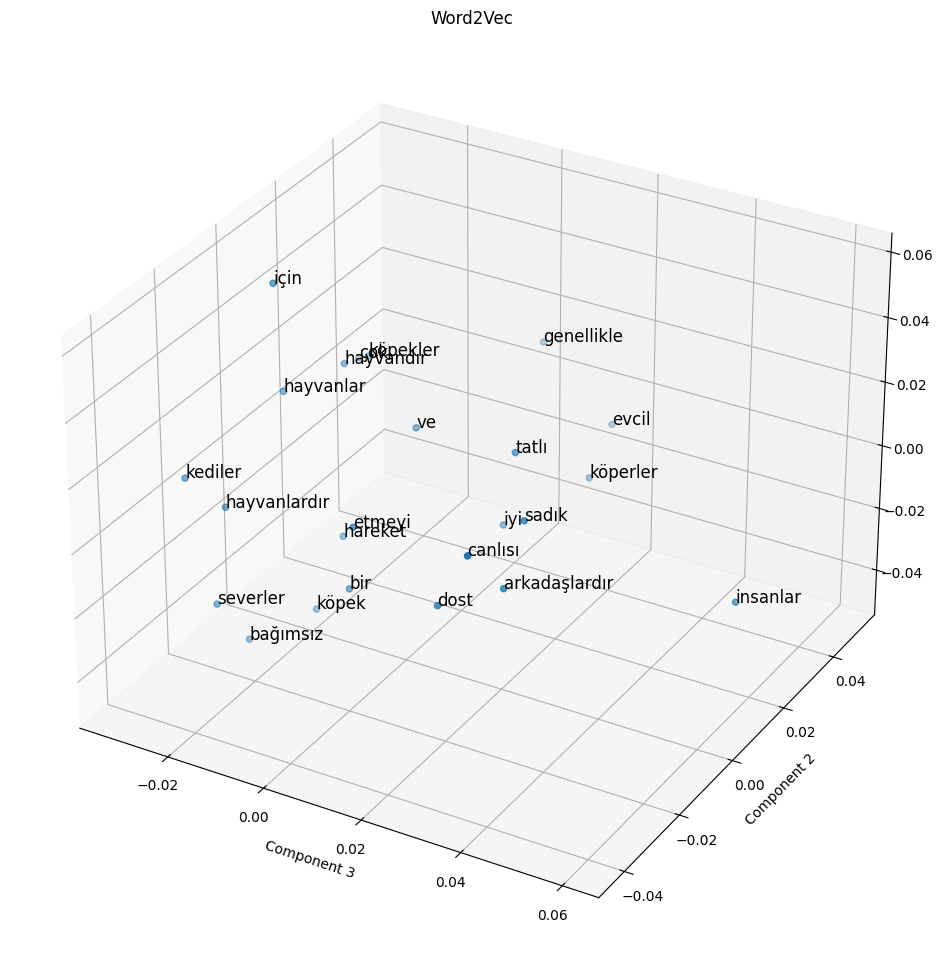

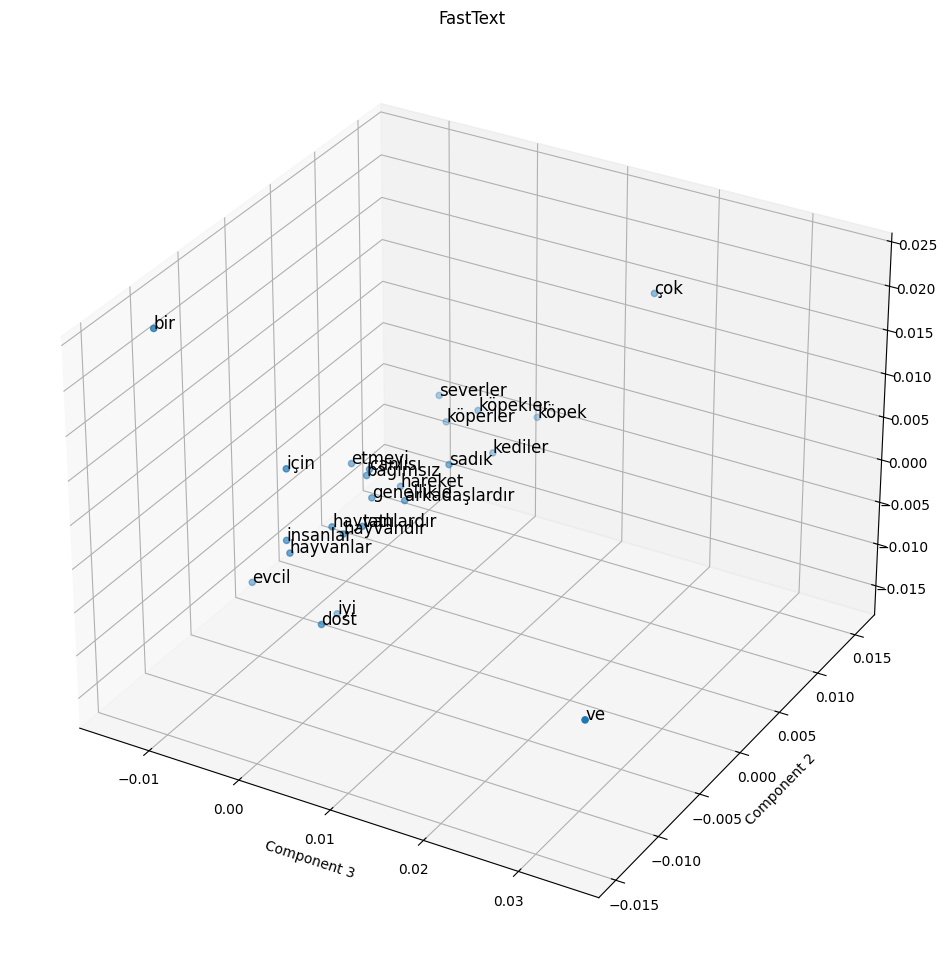

In [8]:
# görselleştirme : PCA
def plot_word_embedding(model, title):
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)[:1000]
    vectors =  [word_vectors[word] for word in words]

    pca = PCA(n_components = 3)
    reduced_vectors = pca.fit_transform(vectors)

    fig = plt.figure(figsize = (12, 12))
    axes = fig.add_subplot(111, projection = '3d')
    scatter = axes.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    for i, word in enumerate(words):
        axes.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize = 12)
    
    axes.set_title(title)
    axes.set_xlabel("Component 1")
    axes.set_ylabel("Component 2")
    axes.set_xlabel("Component 3")
    plt.show()

plot_word_embedding(word2_vec_model, "Word2Vec")
plot_word_embedding(fast_text_model, "FastText")